In [1]:
# General imports
import numpy as np
np.random.seed(20)
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import sys
import os
sys.path.append('../utilities')
import drawing_utils


In [3]:
version = 'v6'

labels=['Radius','Thickness','NPanels', 'Theta', 'Length']


data = np.genfromtxt(f'out/{version}/Ge77_rates_{version}.csv',
                     dtype=None,
                     delimiter=',',
                    skip_header = 2)
print(data)

[(  0, b'LF', 4., 124., 16., 196.,  105.23714604, 18.,   3. , 300. ,  42., 4.79280691e+06,  37,  6.08276253, 0.00031852, 5.23732682e-05, 0.15746766, 0.02608586, 0.02565884,    50000,  123426)
 (  1, b'LF', 4., 200.,  7., 230.,   89.68035054, 27., 134. , 300. ,  42., 6.66065975e+07,  41,  6.40312424, 0.000391  , 6.10766555e-05, 0.19299201, 0.03039659, 0.03008382,    50000,  111594)
 (  2, b'LF', 4., 139.,  8.,  95.,  217.12084868,  4.,  17. , 300. ,  42., 4.96218681e+06,  31,  5.56776436, 0.00026388, 4.74011622e-05, 0.13058134, 0.02360371, 0.02338138,    50000,  124703)
 (  3, b'LF', 4., 198.,  7., 357.,   57.77725665, 28.,  45. , 300. ,  42., 3.55848560e+07,  40,  6.32455532, 0.00035837, 5.66731634e-05, 0.17696845, 0.02821303, 0.02783332,    50000,  118730)
 (  4, b'LF', 4., 116., 11.,  67.,  307.85791977,  7., 144. , 300. ,  42., 3.29531564e+07,  29,  5.38516481, 0.00025435, 4.72368364e-05, 0.12561276, 0.02346594, 0.02319392,    50000,  121272)
 (  5, b'LF', 4., 130.,  3., 271.,   76.

/var/folders/99/0svbmlns6xs9l9p55lcr912r0000gn/T/ipykernel_2452/520897441.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(f'out/{version}/Ge77_rates_{version}.csv',


In [4]:

x_train_l, x_train_h, y_train_l, y_train_h = ([],[],[],[])
error_low = []
error_hi = []

for entry in data:
    if entry[1] == b'LF':
        x_train_l.append([entry[3],entry[4],entry[5],entry[7],entry[8]])
        y_train_l.append(entry[-5])
        error_low.append(entry[-3])
    else:
        x_train_h.append([entry[3],entry[4],entry[5],entry[7],entry[8]])
        y_train_h.append(entry[-5])
        error_hi.append(entry[-3])

x_train_l, x_train_h, y_train_l, y_train_h = (np.atleast_2d(x_train_l), np.atleast_2d(x_train_h), np.atleast_2d(y_train_l).T, np.atleast_2d(y_train_h).T)



In [5]:
x,y,z,c = drawing_utils.GetFormated(x_train_l,0,1,2,y_train_l)
drawing_utils.draw_samples_distribution_3D_rotating(x,y,z,c)
x,y,z,c = drawing_utils.GetFormated(x_train_l,3,4,2,y_train_l)
drawing_utils.draw_samples_distribution_3D_rotating(x,y,z,c)

/Users/aschuetz/Documents/Analysis/legend/ML/legend-multi-fidelity-surrogate-model/surrogate-model/../utilities/drawing_utils.py:107: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



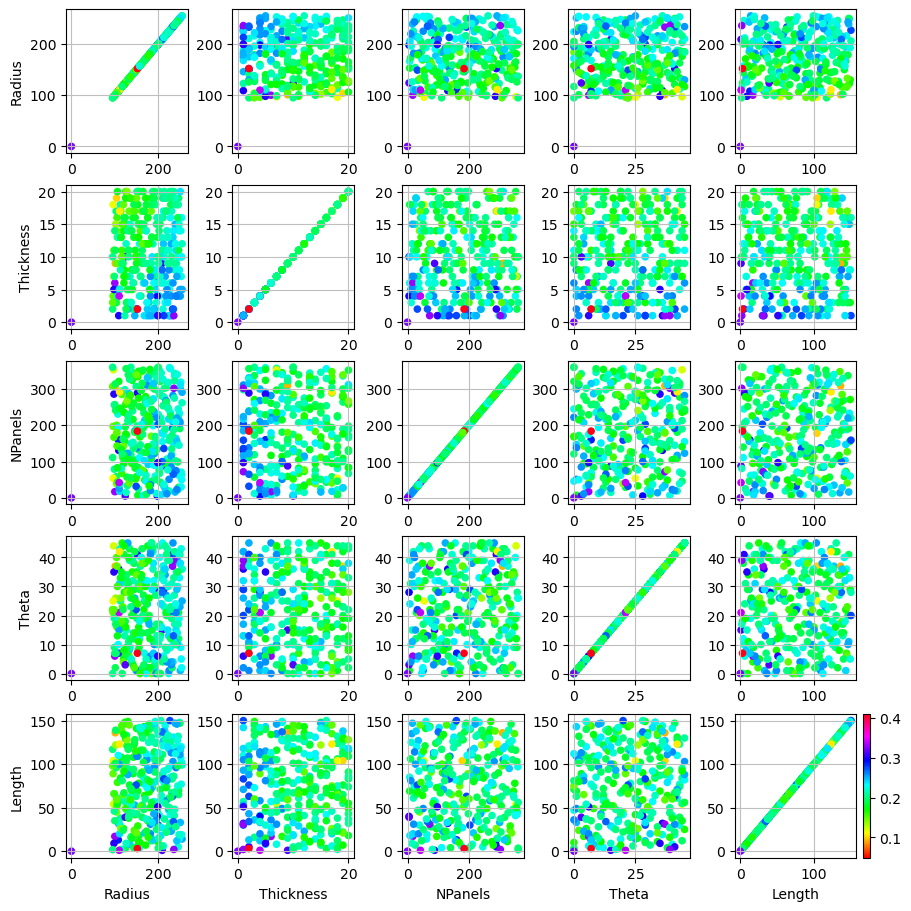

In [38]:
drawing_utils.DrawParameterCorrelations(x_train_l, y_train_l, labels)